In [1]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
target

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [3]:
x_train = pd.read_csv('x_train.csv')
x_train = x_train.set_index('Unnamed: 0')
x_train = x_train.T
x_train

Unnamed: 0,BTN3A2,RAN,EIF5AL1///EIF5A,PIGK,HLA-DRB5,YWHAE,SNORD115-48,PDIA3P1///PDIA3,PLS3,TBCA,...,RAP1B,RAB18,ZNF845,RAP1A,TRAPPC6B,TMEM106B,MYL12B///MYL12A,HLA-DRB1///HLA-DQB1,NSA2,LOC1720///DHFR
GSM949180,0.717031,1.219775,1.245207,1.228655,1.654974,0.941833,-0.884181,1.050789,0.773126,0.416923,...,1.297621,0.990524,1.195081,1.049876,1.086116,1.201404,0.627763,1.268474,0.420213,0.999604
GSM949170,-1.966958,-2.114323,-2.192534,-2.034051,-0.825342,-2.317651,1.896197,-2.888022,-2.401353,-2.099379,...,-2.006969,-2.222744,-1.606608,-0.209340,-2.201885,-2.827757,-2.269600,-0.965662,-2.814892,-1.159589
GSM949168,-0.540533,0.301957,0.401050,0.398027,-1.157822,0.384534,-0.364676,0.412422,0.377185,0.266478,...,0.556749,0.793749,0.701266,0.372581,0.628731,0.395736,0.449548,-0.894563,0.811357,0.157742
GSM949182,-1.203280,-0.370498,-0.389320,-0.568037,-0.232953,0.248302,0.190150,-0.086211,-0.240545,0.025255,...,-0.536831,-0.629122,-0.123618,-1.186376,-0.836733,-0.640241,0.691708,-1.403446,-1.159732,-0.252889
GSM949183,-0.111605,0.460490,0.787127,0.540133,1.045969,0.707560,-0.593427,0.336917,0.289080,0.700133,...,0.651024,0.735630,0.212441,0.918134,0.678331,0.908088,0.390368,1.395943,0.879234,1.044839
GSM949175,1.544060,0.751832,1.061841,1.429659,2.050064,0.928501,-0.640731,0.850415,1.142798,0.119216,...,0.644871,1.401768,0.514071,0.617107,1.378991,0.969376,0.504988,1.348316,1.091283,1.271291
GSM949173,-0.450279,-0.216317,-0.806391,-1.493704,-0.624041,-0.386176,0.133400,-0.119317,-1.061854,-0.516424,...,-0.589591,-0.651315,0.394681,-1.552264,-0.871229,-0.254215,0.452371,-0.896090,-0.048739,-0.261616
GSM949179,1.154720,0.859567,0.819971,1.289122,-0.742076,0.946207,-0.753186,0.984838,1.109389,0.381442,...,0.585914,0.870679,0.632286,0.821011,0.818615,0.636183,0.336412,-0.091715,0.106694,0.461882
GSM949177,0.668854,0.216624,0.229172,0.158221,0.629989,0.192481,-0.945636,0.002737,0.478662,0.663149,...,0.403096,0.188945,-0.026007,0.437009,0.178495,0.113378,0.335820,0.281443,0.695085,0.450702
GSM949169,0.134567,0.117922,-0.242962,0.087491,-0.575238,0.098438,-0.742972,-0.134047,0.392988,0.263069,...,0.480296,0.036443,-0.995848,0.235116,0.165201,-0.021545,0.363830,-0.200582,-0.115264,0.115568


In [4]:
x_test = pd.read_csv('x_test.csv')
x_test = x_test.set_index('Unnamed: 0')
x_test

,BTN3A2,RAN,EIF5AL1///EIF5A,PIGK,HLA-DRB5,YWHAE,SNORD115-48,PDIA3P1///PDIA3,PLS3,TBCA,...,RAP1B,RAB18,ZNF845,RAP1A,TRAPPC6B,TMEM106B,MYL12B///MYL12A,HLA-DRB1///HLA-DQB1,NSA2,LOC1720///DHFR
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GSM949166,-0.963297,0.164441,0.278576,0.282827,-0.442098,0.388788,0.005274,-0.168971,0.293461,0.938526,...,0.506854,0.644095,-0.470514,0.577746,0.656163,0.935950,0.227955,-0.293457,0.307063,0.507571
GSM949172,0.099363,-1.719697,-1.510551,-1.182364,-0.495233,-1.637993,2.121379,-0.524131,-0.981588,-2.048041,...,-1.077467,-1.508236,-1.371877,-1.424904,-0.817756,-1.006599,-1.411103,0.730102,-0.926325,-2.826532
GSM949174,0.700037,0.590744,0.276622,-0.007986,-0.668277,-0.067584,-0.457960,0.383543,0.074839,0.576212,...,0.203841,-0.475306,-0.695846,0.210777,-0.286000,-0.224442,0.057021,-0.514741,-0.087968,-0.966500
GSM949176,1.509252,0.749110,1.280992,0.708143,1.839369,0.528161,-0.637354,1.300698,0.851785,-0.058072,...,0.414035,0.639247,0.301808,0.269990,0.854418,0.650991,0.352165,2.189474,1.274341,-0.274780


In [5]:
y_train = pd.read_csv('y_train.csv')
y_train

,label
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,0


In [6]:
y_test = pd.read_csv('y_test.csv')
y_test

,label
0,0
1,0
2,1
3,1


In [7]:
#Use the Random Forest(RF) algorithm to rank the feature importance on the training set
param_grid_rf = {
                 'n_estimators':np.arange(100, 1000, 100),
                 'criterion':['gini', 'entropy'],
}

In [ ]:
rfc = RandomForestClassifier(random_state=12345)
GS = GridSearchCV(rfc,param_grid_rf,cv=5)
GS.fit(x_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

In [9]:
# Train the model with best parameter
rfc=RandomForestClassifier(criterion='gini',  n_estimators=100, random_state=12345)
rfc=rfc.fit(x_train,y_train)
#Score the Random forest
y_pred = rfc.predict(x_test)
print(accuracy_score(y_test, y_pred))
aaa = pd.DataFrame(rfc.feature_importances_)
aaa.to_csv('feature_weights.csv', header=None)

0.5


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


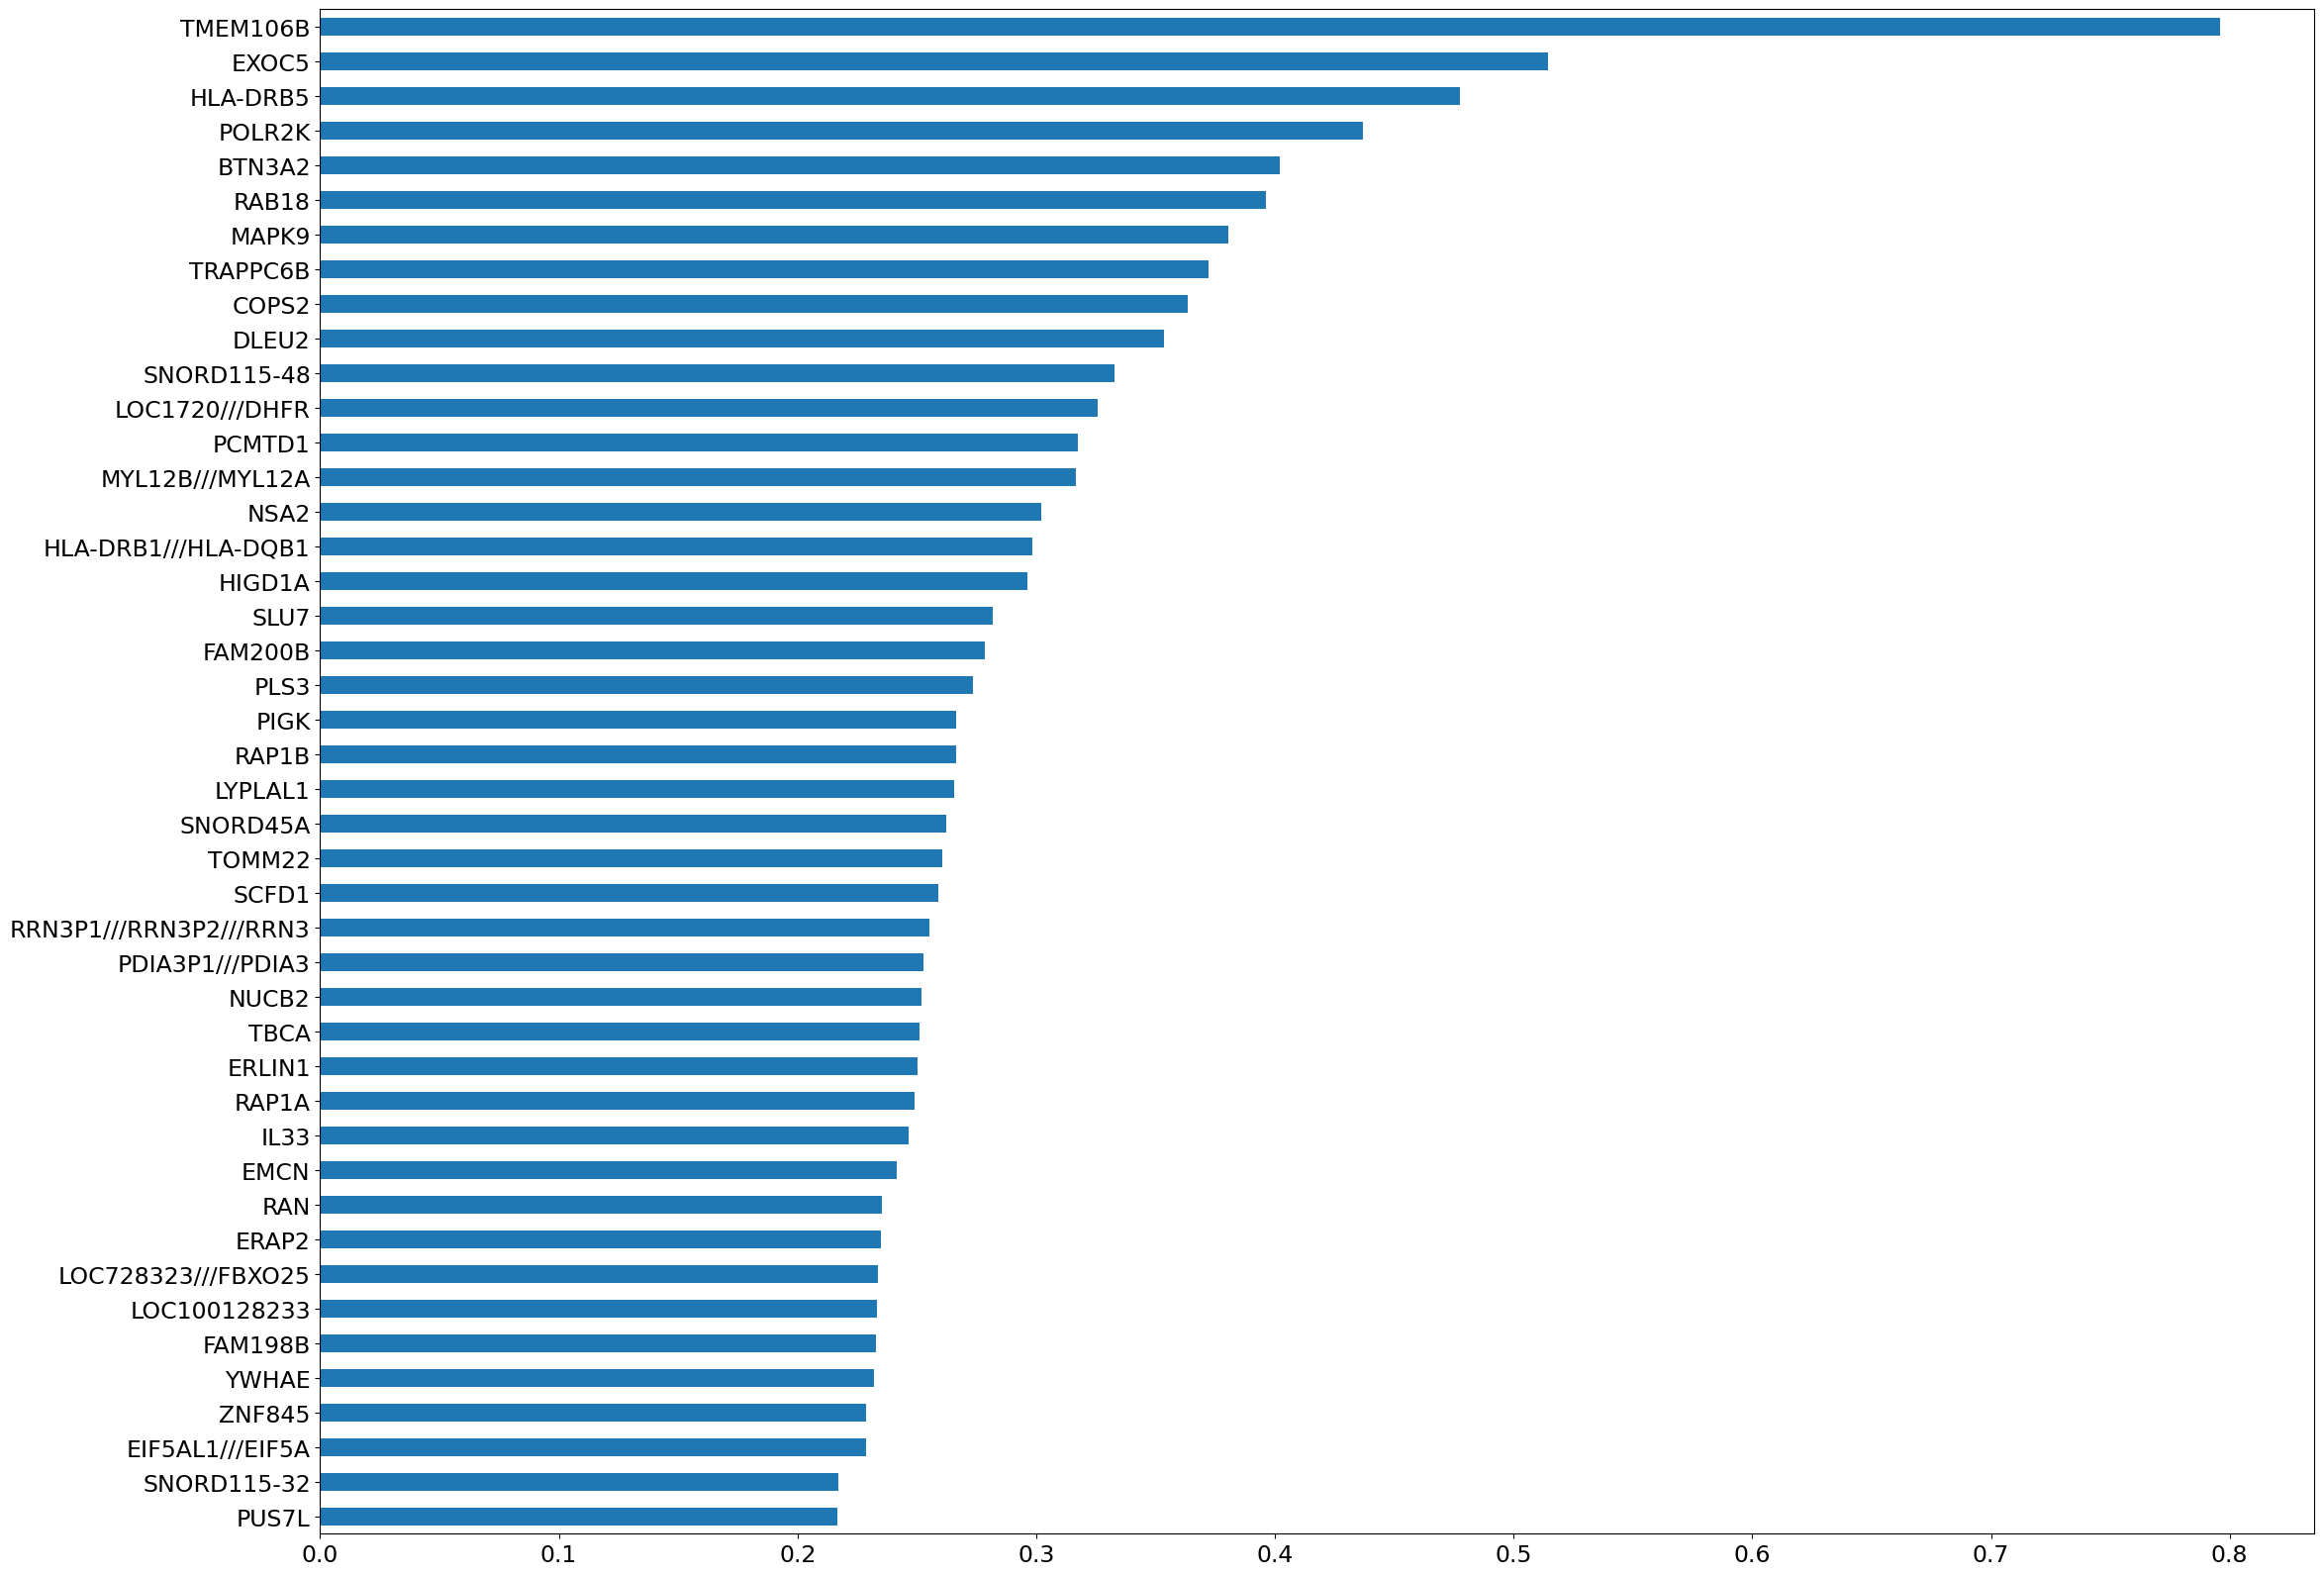

In [15]:
#Merge the weights with the data of x_tain and arrange them by weight from large to small, 
#retain the top 50 genes with the largest weights get data_all_merge.csv 
#then make a bar chart of feature importance and save it
c = pd.read_csv('C:\\Users\\hemanth\\desktop\\OSA_ML\\3)ML\\GSE38792\\data_all_merge_RF(GSE38792).csv')
c = c.set_index('ID')
plt.figure(figsize=(26, 20))
c.iloc[:,-1].plot(kind='barh')  # 横向柱状图
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.ylabel('')
plt.savefig(r'feature_importance(2)', dpi=600)
plt.show()

In [16]:
# feature_sorted.csv is a sorted list of feature columns sorted from largest to smallest by weight value
feature_importance = pd.read_csv('C:\\Users\\hemanth\\desktop\\OSA_ML\\3)ML\\GSE38792\\data_all_merge_RF(GSE38792).csv')
# Save features whose absolute weights are greater than mean wight of all features (0.0204)
feature_importance

,ID,GSM949164,GSM949166,GSM949168,GSM949169,GSM949170,GSM949171,GSM949172,GSM949173,GSM949174,GSM949175,GSM949176,GSM949177,GSM949178,GSM949179,GSM949180,GSM949181,GSM949182,GSM949183,weights
0,PUS7L,6.609332,6.562434,6.766603,6.473211,6.283567,5.765224,6.321634,6.239540,6.632625,7.138286,7.385241,6.654001,6.915643,7.338952,7.205431,6.744513,5.903339,7.228012,0.216644
1,SNORD115-32,5.626750,4.717022,4.439112,4.337800,5.799052,5.953848,5.425667,5.521461,4.450678,4.521721,4.307796,4.585043,4.745118,4.524395,4.585760,4.482615,5.489478,4.414862,0.216971
2,EIF5AL1///EIF5A,10.303610,10.339420,10.401470,10.075190,9.087467,9.340944,9.432984,9.789737,10.338430,10.736250,10.847280,10.314390,10.392010,10.613710,10.829150,10.128950,10.001040,10.597070,0.228604
3,ZNF845,7.931763,7.079179,7.736512,6.784483,6.441865,6.236518,6.573542,7.564527,6.952775,7.631501,7.512428,7.328534,7.727784,7.697816,8.013527,8.227389,7.273777,7.462296,0.228701
4,YWHAE,10.848410,11.038390,11.035560,10.845210,9.237703,9.383222,9.689903,10.522780,10.734750,11.397480,11.131120,10.907780,11.099980,11.409260,11.406350,11.151590,10.944920,11.250480,0.231864
5,FAM198B,8.976975,8.776680,8.188598,9.452472,8.544713,7.365430,8.432404,7.882525,8.966163,9.408761,8.812427,8.734442,8.675551,9.093741,9.245001,8.988233,8.817333,9.078967,0.232867
6,LOC100128233,5.215646,4.843991,4.497576,4.849651,6.527161,6.242416,5.476528,5.492120,4.851059,4.768734,4.613200,5.323820,4.543569,4.566283,4.732102,5.194571,5.084714,4.545522,0.233120
7,LOC728323///FBXO25,7.453761,7.779439,8.432172,7.585599,4.953617,4.720154,2.759404,7.081071,7.992021,8.454990,8.187614,8.166570,8.524587,8.345092,8.386199,8.770247,6.771564,8.285425,0.233547
8,ERAP2,7.474772,6.589459,6.327614,7.767768,6.266751,6.297034,6.574798,6.081147,7.700308,8.901646,8.002126,7.601239,6.244270,8.691087,8.939181,8.108352,5.942857,7.655072,0.234925
9,RAN,8.820408,8.968137,9.047462,8.941303,7.653653,7.656918,7.881289,8.748500,9.214046,9.306968,9.305398,8.998238,9.365245,9.369114,9.576897,9.067004,8.659562,9.138910,0.235267


In [17]:
feature_list = feature_importance['ID']
feature_list = feature_list[:10]
feature_list

0                 PUS7L
1           SNORD115-32
2       EIF5AL1///EIF5A
3                ZNF845
4                 YWHAE
5               FAM198B
6          LOC100128233
7    LOC728323///FBXO25
8                 ERAP2
9                   RAN
Name: ID, dtype: object

In [18]:
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [19]:
#Logistic Regression
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# Divide into training and test set
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [20]:
param_grid_lr = {
                 'C': np.arange(0.1, 3., 0.5),
                 }

In [21]:
# Perform 10-fold cross validation on the training set, 
# verify the AUC on the validation set, 
# and save the AUC on the training set and validation set
from sklearn.model_selection import StratifiedKFold #Cross Validation
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i1 in range(1, len(x_train.columns)+1):
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=5, shuffle = True,random_state=j)#Divide the training/test to 5 mutually exclusive subsets
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i1], y_train)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        
        rfc = rfc.fit(x_train.iloc[:, 0:i1], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i1], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i1])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i1])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i1])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i1])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        best_para_train.append({'c':GS.best_params_['C']})
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i1] = fpr
        tpr_list[i1] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_lr_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_lr_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_lr_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_lr_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_para_lr_train.csv', index=False)

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8541666666666666
1.0
0.8333333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8541666666666667
1.0
0.875
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8958333333333334
0.75
0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8958333333333334
1.0
0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8958333333333334
1.0


In [22]:
#From the above results, we can see that logistic regression can achieve maximum AUC when selecting the first 33 features.
#This code is used to save the information of selecting 26 feature prediction for the lagistic regression model on the test set
from sklearn.model_selection import StratifiedKFold #Cross Validation
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i1 in [10]:
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=5, shuffle = True,random_state=j)#Divide the training/test to 5 mutually exclusive subsets
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i1], y_train)
        print(i1)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        rfc = rfc.fit(x_train.iloc[:, 0:i1], y_train)
        
        # Score the random forest
        score_rfc = rfc.score(x_test.iloc[:, 0:i1], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i1])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i1])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i1] = fpr
        tpr_list[i1] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_lr.csv')
t1.to_csv('tpr_lr.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_lr.csv')
y_test_df.to_csv('y_test_lr.csv')

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

10
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 1.0, specificity: 0.5
f1_score: 0.8


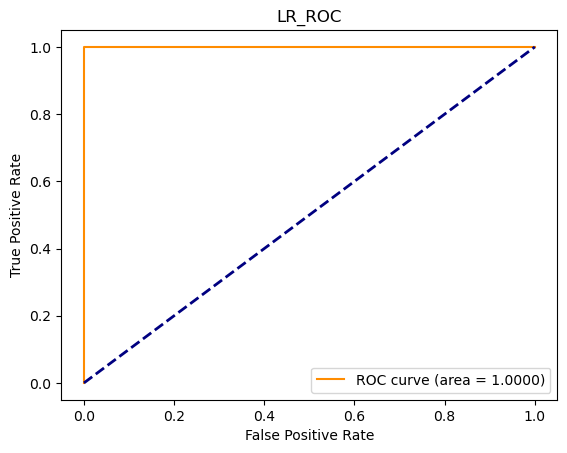

In [23]:
# This code uses the prediction information of the previous code to test the ROC curve of 
#26 feature prediction of the logistic regression model on the testfrom sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_lr.csv')
y_pred_df = pd.read_csv('y_pred_lr.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_lr.csv')
tpr_df = pd.read_csv('tpr_lr.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_ROC')
plt.legend(loc="lower right")
plt.savefig(r'lr_ROC',dpi=600)
plt.show()

In [24]:
y_test

[0, 0, 1, 1]

In [26]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [27]:
# 从上面的结果可以看出,logistic regression选择前33个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试logistic regression模型选择26个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [10]:
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=5, shuffle = True,random_state=j)#将训练/测试数据集划分10个互斥子集
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_lr_outer.csv')
t1.to_csv('tpr_lr_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_lr_outer.csv')
y_test_df.to_csv('y_test_lr_outer.csv')  

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

10
0.925


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 0.9, specificity: 0.5
f1_score: 0.7826


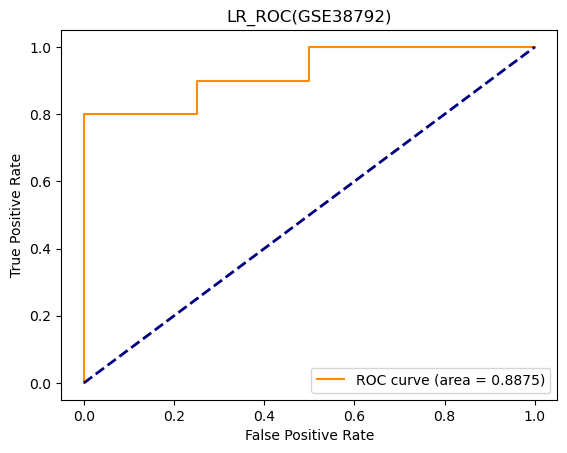

In [58]:
# 这段代码利用上段代码的预测信息，在测试集上测试logistic regression模型选择26个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_lr_outer.csv')
y_pred_df = pd.read_csv('y_pred_lr_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_lr_outer.csv')
tpr_df = pd.read_csv('tpr_lr_outer.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_ROC(GSE38792)')
plt.legend(loc="lower right")
plt.savefig(r'lr_ROC_outer(1)',dpi=600)
plt.show()

In [30]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [31]:
param_grid_svm = {
                  'kernel': ["linear", "poly", "rbf", "sigmoid"],
                  'degree': np.arange(1, 3, 1)}

In [32]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
from sklearn.svm import SVC
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i in range(1, len(x_train.columns)+1):
        rfc = SVC(max_iter=-1, random_state=12345, probability=True)
        GS = GridSearchCV(rfc, param_grid_svm, cv=5)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        best_para_train.append({'kernel':GS.best_params_['kernel'],'degree':GS.best_params_['degree']})
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_svm_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_svm_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_svm_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_svm_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_df_svm_train.csv', index=False)

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

1
0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

2
0.75
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

3
0.8541666666666667
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

4
0.875
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

5
0.875
0.75


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

6
0.9791666666666667
0.75


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

7
0.9791666666666667
0.75


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

8
0.9791666666666667
0.75


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

9
0.8958333333333334
1.0
10
0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [33]:
# 从上面的结果可以看出,SVM选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试SVM模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [5]:
        rfc = SVC(random_state=j)
        GS = GridSearchCV(rfc, param_grid_svm, cv=5)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_svm.csv')
t1.to_csv('tpr_svm.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_svm.csv')
y_test_df.to_csv('y_test_svm.csv')

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

5
0.75


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 1.0, specificity: 0.5
f1_score: 0.8


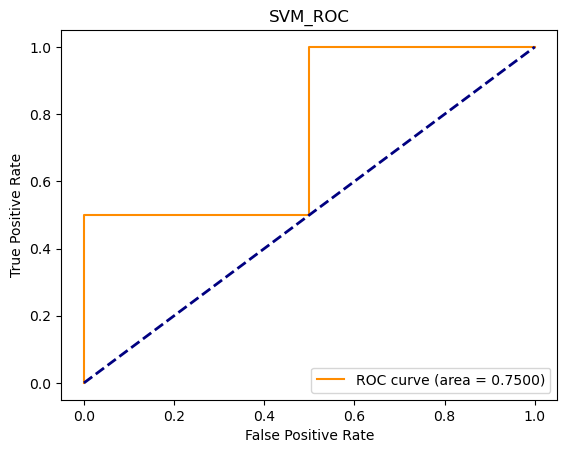

In [34]:
# 这段代码利用上段代码的预测信息，在测试集上测试SVM模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_svm.csv')
y_pred_df = pd.read_csv('y_pred_svm.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_svm.csv')
tpr_df = pd.read_csv('tpr_svm.csv')
fpr = fpr_df['5'].tolist()
tpr = tpr_df['5'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM_ROC')
plt.legend(loc="lower right")
plt.savefig(r'SVM_ROC',dpi=600)
plt.show()

In [40]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [41]:
# 从上面的结果可以看出,SVM选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试SVM模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [5]:
        rfc = SVC(random_state=j)
        GS = GridSearchCV(rfc, param_grid_svm, cv=5)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_svm_outer.csv')
t1.to_csv('tpr_svm_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_svm_outer.csv')
y_test_df.to_csv('y_test_svm_outer.csv')

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

5
0.8875


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 0.9, specificity: 0.5
f1_score: 0.7826


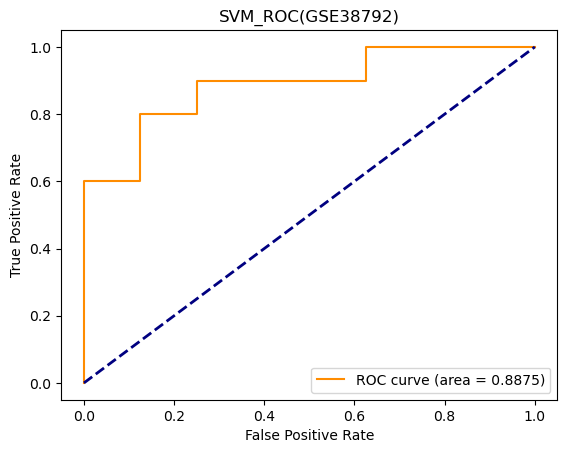

In [59]:
# 这段代码利用上段代码的预测信息，在测试集上测试SVM模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_svm_outer.csv')
y_pred_df = pd.read_csv('y_pred_svm_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_svm_outer.csv')
tpr_df = pd.read_csv('tpr_svm_outer.csv')
fpr = fpr_df['5'].tolist()
tpr = tpr_df['5'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM_ROC(GSE38792)')
plt.legend(loc="lower right")
plt.savefig(r'SVM_ROC_outer(1)',dpi=600)
plt.show()

In [43]:
lr_df = pd.read_csv('auc_lr_train.csv')
lr_test = lr_df.iloc[0,:]
svm_df = pd.read_csv('auc_svm_train.csv')
svm_test = svm_df.iloc[0,:]

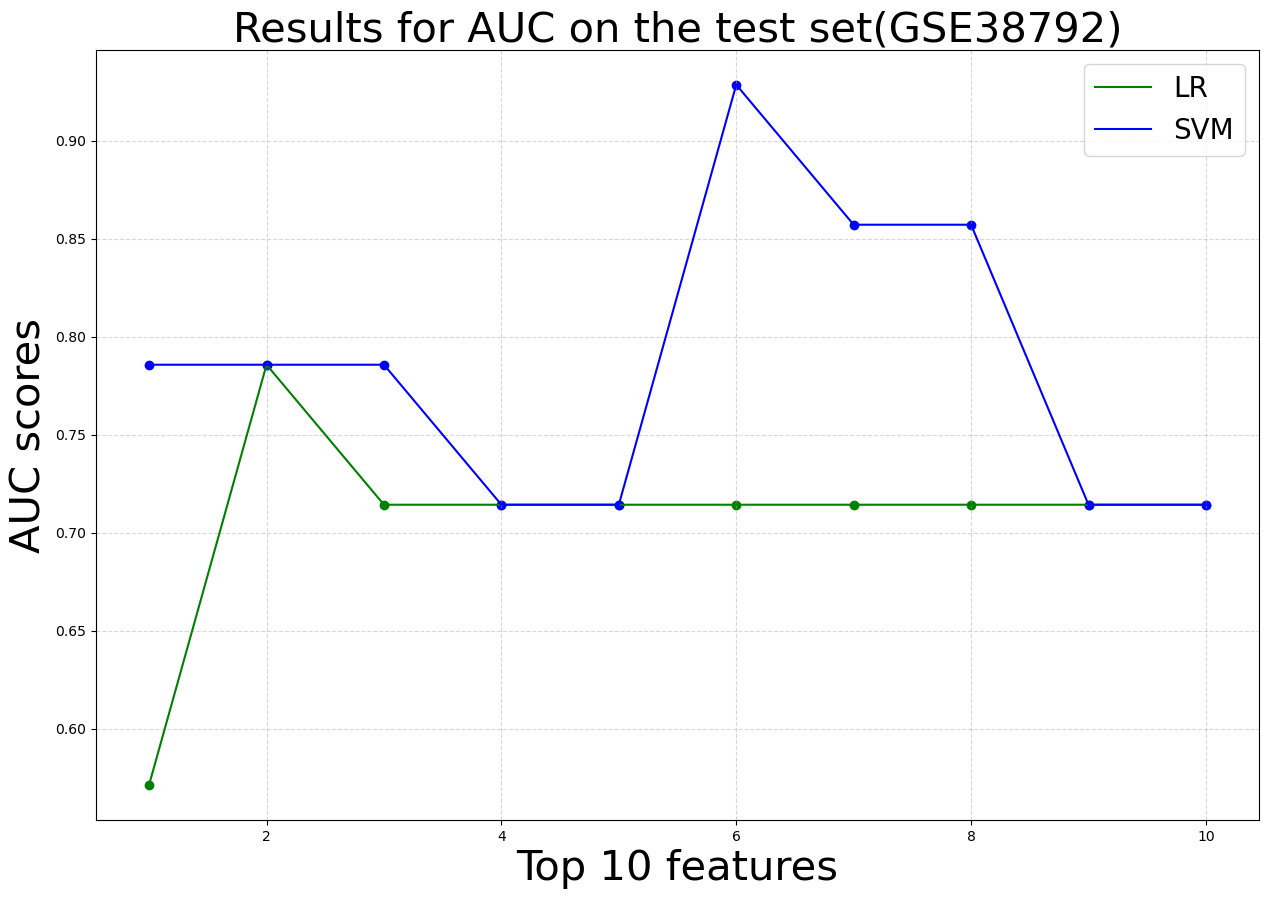

In [56]:
plt.figure(figsize=(15, 10), dpi=100)
genes_num = [i for i in range(1,11)]
plt.plot(genes_num, lr_test, c='green', label="LR")
plt.plot(genes_num, svm_test, c='blue', label="SVM")
plt.scatter(genes_num, lr_test, c='green')
plt.scatter(genes_num, svm_test, c='blue')
plt.legend(loc='best', prop={'size': 20})
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Top 10 features", fontdict={'size': 30})
plt.ylabel("AUC scores", fontdict={'size': 30})
plt.title("Results for AUC on the test set(GSE38792)", fontdict={'size': 30})
plt.savefig(r'测试集AUC2.jpg',dpi=600)
plt.show()

In [49]:
lr_df = pd.read_csv('acc_lr_train.csv')
lr_test = lr_df.iloc[0,:]
svm_df = pd.read_csv('acc_svm_train.csv')
svm_test = svm_df.iloc[0,:]

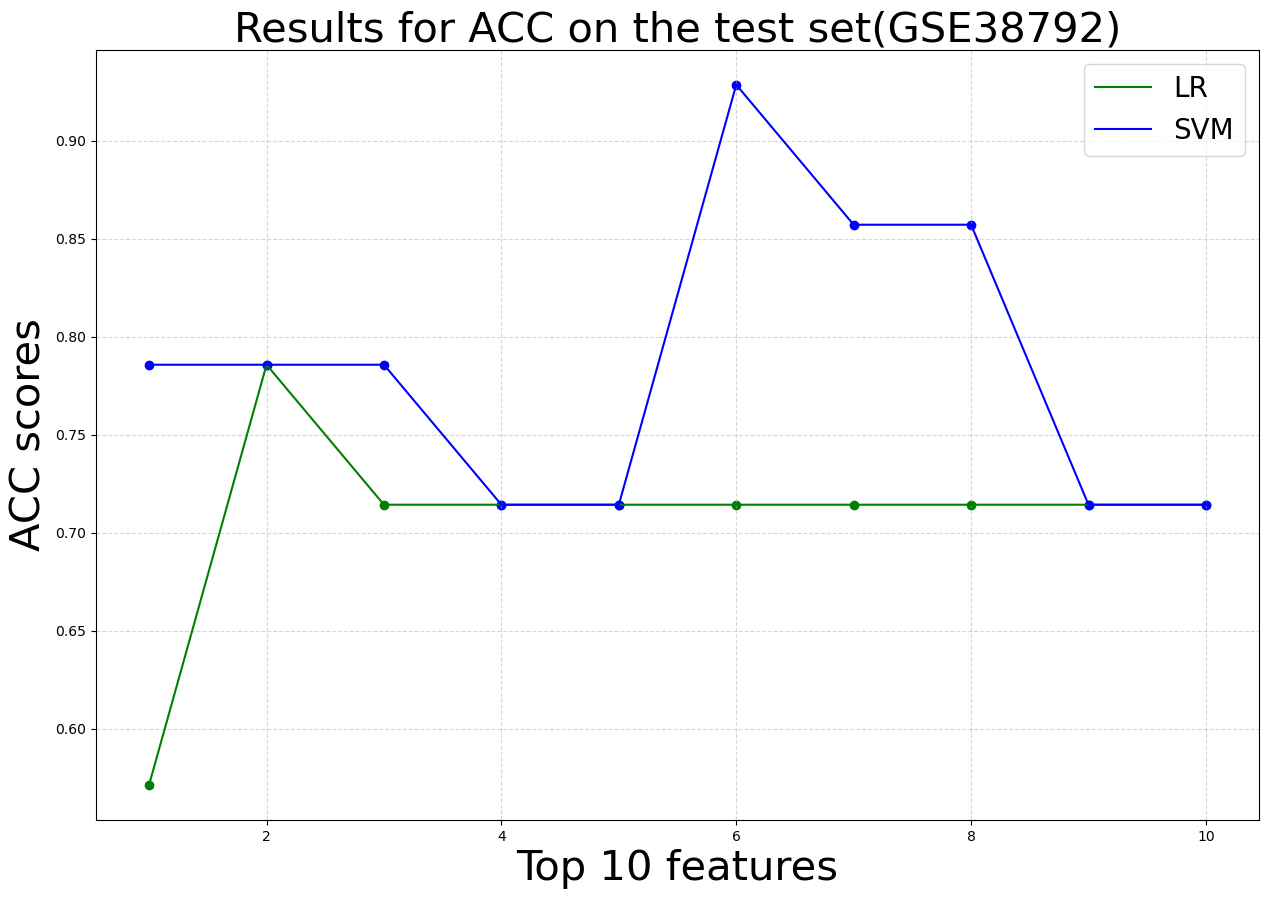

In [57]:
plt.figure(figsize=(15, 10), dpi=100)
genes_num = [i for i in range(1,11)]
plt.plot(genes_num, lr_test, c='green', label="LR")
plt.plot(genes_num, svm_test, c='blue', label="SVM")
plt.scatter(genes_num, lr_test, c='green')
plt.scatter(genes_num, svm_test, c='blue')
plt.legend(loc='best', prop={'size': 20})
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Top 10 features", fontdict={'size': 30})
plt.ylabel("ACC scores", fontdict={'size': 30})
plt.title("Results for ACC on the test set(GSE38792)", fontdict={'size': 30})
plt.savefig(r'测试集ACC2.jpg',dpi=600)
plt.show()